In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv("creditcard.csv") 

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(data.shape) 

(284807, 31)


In [5]:
fraud = data[data['Class'] == 1] 
genuine = data[data['Class'] == 0] 
outlierFraction = len(fraud)/float(len(genuine)) 
print(outlierFraction) 

0.0017304750013189597


In [6]:
x = data.drop(['Class'],axis=1)
y = data["Class"]

In [7]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

# Plotting Graph

In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

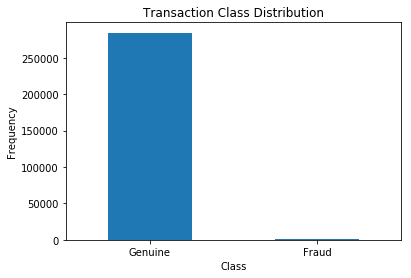

In [10]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
LABELS = ["Genuine", "Fraud"]
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

####  <p style="text-align: center;">  The above graphs depicts that the data is highly imbalanced </p>

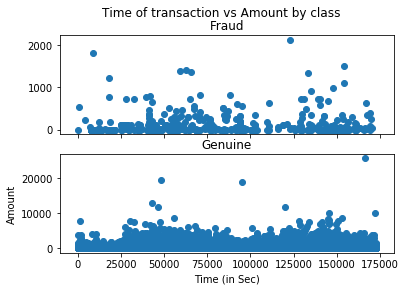

In [60]:
f1, (x1, x2) = plt.subplots(2, 1, sharex=True)
f1.suptitle('Time of transaction vs Amount by class')
x1.scatter(fraud.Time, fraud.Amount)
x1.set_title('Fraud')
x2.scatter(genuine.Time, genuine.Amount)
x2.set_title('Genuine')
plt.xlabel('Time (in Sec)')
plt.ylabel('Amount')
plt.show()

### Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.20,random_state=10)

# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

##### (By resolving imbalanced dataset) 

In [14]:
log1=LogisticRegression(class_weight={1:1000})

In [15]:
log1.fit(xtrain,ytrain)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight={1: 1000}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [16]:
log1.score(xtest,ytest)

0.9548822021698676

In [17]:
log1.score(xtrain,ytrain)

0.9562597379797669

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
pred=log1.predict(xtest)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(ytest,pred)
acc

0.9548822021698676

In [21]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred))


              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56868
           1       0.03      0.91      0.06        94

   micro avg       0.95      0.95      0.95     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.95      0.98     56962



In [22]:
cm = confusion_matrix(ytest,pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
df_cm

,0,1
0,54306,2562
1,8,86


# SVM

In [24]:
from sklearn.svm import SVC

In [25]:
sv = SVC(kernel='rbf',C=.00001)

In [26]:
sv.fit(xtrain,ytrain)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1e-05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [27]:
sv.score(xtest,ytest)

0.9983497770443454

In [28]:
sv.score(xtrain,ytrain)

0.9982531984463122

In [29]:
svpred=sv.predict(xtest)
svpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
acc=accuracy_score(ytest,svpred)
acc

0.9983497770443454

In [31]:
from sklearn.metrics import classification_report
print(classification_report(ytest, svpred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.00      0.00      0.00        94

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
cm = confusion_matrix(ytest,svpred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
df_cm

,0,1
0,56868,0
1,94,0


# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier 

In [34]:
rf = RandomForestClassifier() 
rf.fit(xtrain, ytrain) 

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
rf.score(xtrain,ytrain)

0.9998946652329435

In [36]:
rf.score(xtest,ytest)

0.9996488887328394

In [37]:
rfpred=rf.predict(xtest)
rfpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
acc=accuracy_score(ytest,rfpred)
acc

0.9996488887328394

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest, rfpred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.99      0.80      0.88        94

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [40]:
cm = confusion_matrix(ytest,rfpred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
df_cm

,0,1
0,56867,1
1,19,75


# KNN

# Standardizing the data before applying knn

### As the distance is not biased towards the variables,it shall be giving similar weightage to all the variables. Hence, we should bring all the features to the same scale before applying  KNN (distance based algo)

##### Hence we apply standard scaler to the amount column

In [41]:
from sklearn.preprocessing import StandardScaler
feature=StandardScaler()
data['Noramlized amt']=feature.fit_transform(data['Amount'].values.reshape(-1,1))
data=data.drop(['Amount'],axis=1)

In [42]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Noramlized amt
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [43]:
x1 = data.drop(['Class'],axis=1)
y1 = data["Class"]

In [44]:
x1train,x1test,y1train,y1test = train_test_split(x1,y1,test_size=.20,random_state=10)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier()

In [47]:
knn.fit(x1train,y1train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [48]:
knn.score(x1train,y1train)

0.9985253132612083

In [49]:
knn.score(x1test,y1test)

0.9985077771145676

In [50]:
knnpred=knn.predict(xtest)
knnpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
acc=accuracy_score(ytest,knnpred)
acc

0.9984902215512096

In [52]:
from sklearn.metrics import classification_report
print(classification_report(ytest, knnpred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       1.00      0.09      0.16        94

   micro avg       1.00      1.00      1.00     56962
   macro avg       1.00      0.54      0.58     56962
weighted avg       1.00      1.00      1.00     56962



In [53]:
cm = confusion_matrix(ytest,knnpred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
df_cm

,0,1
0,56868,0
1,86,8


 ## <p style="text-align: right;">This project is made by<br><br> -<b> MAYANK KISHOR</b> <br></p>